# p.19 Sentiment Analysis Module

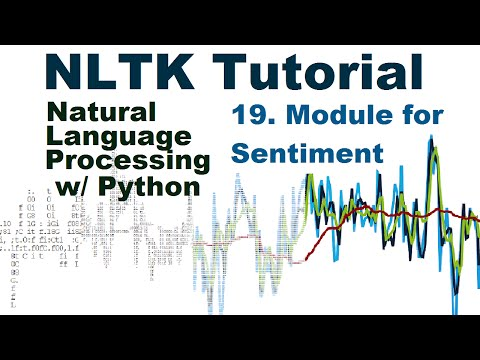

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('eObouMO2qSE')

## 1. Convert the classifier script into a sentiment analysis module

## 2. Example

### 2.1 Save the data and the trained classifiers by pickle.

In fact, for rebuilding the combined vote classifier, we just need to save the trained classifiers and don't need to save the data such as documents and featuresets, but we do need to save word_features to run the combined vote classifier.

In [3]:
import nltk
import random
from nltk.tokenize import word_tokenize
from nltk.classify.scikitlearn import SklearnClassifier
import pickle

from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

from nltk.classify import ClassifierI
from statistics import mode

class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers = classifiers
        
    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
            
        return mode(votes)
    
    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
            
        choice_votes = votes.count(mode(votes))
        conf = choice_votes/len(votes)
        
        return conf

# If you see the "UnicodeDecodeError", add the options "encoding='utf-8', errors='replace'".
short_pos = open("short_reviews/positive.txt", "r", encoding='utf-8', errors='replace').read()
short_neg = open("short_reviews/negative.txt", "r", encoding='utf-8', errors='replace').read()

all_words = []
documents = []

# Prefix J is adjective, prefix R is adverb, and prefix V is verb.
#allowed_word_types = ["J", "R", "V"]
allowed_word_types = ["J"]

# Note that each entry of documents is a short review, not a single word from the short review.
for p in short_pos.split('\n'):
    documents.append((p, "pos"))
    words = word_tokenize(p)
    pos = nltk.pos_tag(words)
    for w in pos:
        if w[1][0] in allowed_word_types:
            all_words.append(w[0].lower())
    
for n in short_neg.split('\n'):
    documents.append((n, "neg"))
    words = word_tokenize(n)
    neg = nltk.pos_tag(words)
    for w in neg:
        if w[1][0] in allowed_word_types:
            all_words.append(w[0].lower())
    
# Save documents by pickle.
save_documents = open("short_reviews/documents.pickle", "wb")
pickle.dump(documents, save_documents)
save_documents.close()
    
all_words = nltk.FreqDist(all_words)

# Restrict our 'features' to the most common 5000 words.
word_features = list(all_words.keys())[:5000]

# Save word_features by pickle.
save_word_features = open("short_reviews/word_features5k.pickle", "wb")
pickle.dump(word_features, save_word_features)
save_word_features.close()

# Check if each of the most common 5000 words is present in one movie review.
# The input document is a short review.
def find_features(document):
    words = word_tokenize(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)
        
    return features

# Label the 'features' in all the movie reviews.
featuresets = [(find_features(rev), category) for (rev, category) in documents]

# Save featuresets by pickle.
save_featuresets = open("short_reviews/featuresets.pickle", "wb")
pickle.dump(featuresets, save_featuresets)
save_featuresets.close()

random.shuffle(featuresets)

# Partition the entire data set into training set and test set.
training_set = featuresets[:10000]
testing_set = featuresets[10000:]

## 
## Train and save the Naive Bayes classifier by pickle
##
NaiveBayes_classifier = nltk.NaiveBayesClassifier.train(training_set)
print("NaiveBayes_classifier accuracy percent:", (nltk.classify.accuracy(NaiveBayes_classifier, testing_set))*100)

save_naivebayes_classifier = open("short_reviews/naivebayes_classifier5k.pickle", "wb")
pickle.dump(NaiveBayes_classifier, save_naivebayes_classifier)
save_naivebayes_classifier.close()

##
## Train and save the Scikit-Learn MultinomialNB classifier.
##
MultinomialNB_classifier = SklearnClassifier(MultinomialNB())
MultinomialNB_classifier.train(training_set)
print("MNB_classifier accuracy percent:", (nltk.classify.accuracy(MultinomialNB_classifier, testing_set))*100)

save_multinomialnb_classifier = open("short_reviews/multinomialnb_classifier5k.pickle", "wb")
pickle.dump(MultinomialNB_classifier, save_multinomialnb_classifier)
save_multinomialnb_classifier.close()

##
## Scikit-Learn BernoulliNB
##
BernoulliNB_classifier = SklearnClassifier(BernoulliNB())
BernoulliNB_classifier.train(training_set)
print("BernoulliNB_classifier accuracy percent:", (nltk.classify.accuracy(BernoulliNB_classifier, testing_set))*100)

save_bernoullinb_classifier = open("short_reviews/bernoullinb_classifier5k.pickle", "wb")
pickle.dump(BernoulliNB_classifier, save_bernoullinb_classifier)
save_bernoullinb_classifier.close()

##
## Scikit-Learn LogisticRegression
##
LogisticRegression_classifier = SklearnClassifier(LogisticRegression())
LogisticRegression_classifier.train(training_set)
print("LogisticRegression_classifier accuracy percent:", (nltk.classify.accuracy(LogisticRegression_classifier, testing_set))*100)

save_logisticregression_classifier = open("short_reviews/logisticregression_classifier5k.pickle", "wb")
pickle.dump(LogisticRegression_classifier, save_logisticregression_classifier)
save_logisticregression_classifier.close()

##
## Scikit-Learn SGDClassifier
##
SGDClassifier_classifier = SklearnClassifier(SGDClassifier())
SGDClassifier_classifier.train(training_set)
print("SGDClassifier_classifier accuracy percent:", (nltk.classify.accuracy(SGDClassifier_classifier, testing_set))*100)

save_sgdclassifier_classifier = open("short_reviews/sgdclassifier_classifier5k.pickle", "wb")
pickle.dump(SGDClassifier_classifier, save_sgdclassifier_classifier)
save_sgdclassifier_classifier.close()

##
## Scikit-Learn LinearSVC
##
LinearSVC_classifier = SklearnClassifier(LinearSVC())
LinearSVC_classifier.train(training_set)
print("LinearSVC_classifier accuracy percent:", (nltk.classify.accuracy(LinearSVC_classifier, testing_set))*100)

save_linearsvc_classifier = open("short_reviews/linearsvc_classifier5k.pickle", "wb")
pickle.dump(LinearSVC_classifier, save_linearsvc_classifier)
save_linearsvc_classifier.close()

##
## Scikit-Learn NuSVC
##
NuSVC_classifier = SklearnClassifier(NuSVC())
NuSVC_classifier.train(training_set)
print("NuSVC_classifier accuracy percent:", (nltk.classify.accuracy(NuSVC_classifier, testing_set))*100)

save_nusvc_classifier = open("short_reviews/nusvc_classifier5k.pickle", "wb")
pickle.dump(NuSVC_classifier, save_nusvc_classifier)
save_nusvc_classifier.close()

voted_classifier = VoteClassifier(NaiveBayes_classifier, 
                                  MultinomialNB_classifier, 
                                  BernoulliNB_classifier, 
                                  LogisticRegression_classifier, 
                                  LinearSVC_classifier)
print("voted_classifier accuracy percent:", (nltk.classify.accuracy(voted_classifier, testing_set))*100)

NaiveBayes_classifier accuracy percent: 72.28915662650603
MNB_classifier accuracy percent: 73.3433734939759
BernoulliNB_classifier accuracy percent: 73.3433734939759
LogisticRegression_classifier accuracy percent: 72.89156626506023


/home/renwei/anaconda3/envs/nltk/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier_classifier accuracy percent: 69.57831325301204
LinearSVC_classifier accuracy percent: 69.87951807228916
NuSVC_classifier accuracy percent: 70.18072289156626
voted_classifier accuracy percent: 72.89156626506023


### 2.2 Load the trained classifiers by pickle

Create a module sentiment_mod which can be reused to analyze the sentiment with the combined vote classifier. Note that the combined vote classifier is built upon the loaded simple classifiers.

In [7]:
##
## SAVE ME as sentiment_mod.py
## 

import nltk
from nltk.classify import ClassifierI
from nltk.classify.scikitlearn import SklearnClassifier
from nltk.tokenize import word_tokenize

import pickle

from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

from statistics import mode

class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers = classifiers

    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes)

    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)

        choice_votes = votes.count(mode(votes))
        conf = choice_votes / len(votes)
        return conf

##
## We don't need to load the documents and featuresets to build the combined vote classifier, 
## but we do need to load word_features to run the combined vote classifier.
##
# documents_f = open("short_reviews/documents.pickle", "rb")
# documents = pickle.load(documents_f)
# documents_f.close()

word_features5k_f = open("short_reviews/word_features5k.pickle", "rb")
word_features = pickle.load(word_features5k_f)
word_features5k_f.close()

def find_features(document):
    words = word_tokenize(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

# featuresets_f = open("short_reviews/featuresets.pickle", "rb")
# featuresets = pickle.load(featuresets_f)
# featuresets_f.close()

# random.shuffle(featuresets)
# print(len(featuresets))

# testing_set = featuresets[10000:]
# training_set = featuresets[:10000]

# Load the classifiers by pickle.
open_file = open("short_reviews/naivebayes_classifier5k.pickle", "rb")
NaiveBayes_classifier = pickle.load(open_file)
open_file.close()


open_file = open("short_reviews/multinomialnb_classifier5k.pickle", "rb")
MultinomialNB_classifier = pickle.load(open_file)
open_file.close()

open_file = open("short_reviews/bernoullinb_classifier5k.pickle", "rb")
BernoulliNB_classifier = pickle.load(open_file)
open_file.close()


open_file = open("short_reviews/logisticregression_classifier5k.pickle", "rb")
LogisticRegression_classifier = pickle.load(open_file)
open_file.close()


open_file = open("short_reviews/linearsvc_classifier5k.pickle", "rb")
LinearSVC_classifier = pickle.load(open_file)
open_file.close()

voted_classifier = VoteClassifier(NaiveBayes_classifier,
                                  MultinomialNB_classifier,
                                  BernoulliNB_classifier,
                                  LinearSVC_classifier,
                                  LogisticRegression_classifier)

def sentiment(text):
    feats = find_features(text)

    return voted_classifier.classify(feats), voted_classifier.confidence(feats)

## 2.3 Test the module sentiment_mod.

In [11]:
import sentiment_mod as s

print(s.sentiment("This move was awesome! The acting was great, plot was wonderful, and there were pythons...so yea!"))
print(s.sentiment("This movie was utter junk. There were absolutely 0 pythons. I don't see what the point was at all. Horrible movie, 0/10"))

('pos', 1.0)
('neg', 1.0)
